<a href="https://colab.research.google.com/github/nataliaMS21/MetodosComputacionales810/blob/main/Librerias/Actividad02_Librerias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---



## 1.
Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$



Introduce la velocidad de la moto (m/s): 70
Introduce la aceleración del policía (m/s²): 70

El encuentro ocurre en t = 2.00 segundos
La posición de encuentro es x = 140.00 metros


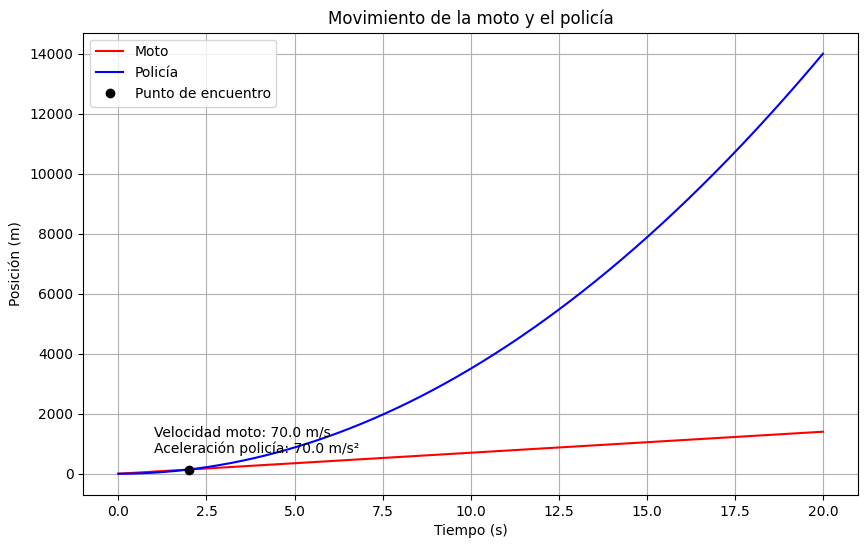

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# calcular posición de la moto en cualquier tiempo t
def posicion_moto(v_m, t):
    return v_m * t  # x = v * t (velocidad constante)

#  calcular posición del policía en cualquier tiempo t
def posicion_policia(a_p, t):
    return 0.5 * a_p * t**2  # x = 1/2 * a * t^2 (inicia en reposo)

# Datos iniciales
v_moto = float(input("Introduce la velocidad de la moto (m/s): "))
a_policia = float(input("Introduce la aceleración del policía (m/s²): "))

# rango de tiempo para la gráfica (de 0 a 20 segundos)
tiempo = np.linspace(0, 20, 1000)

# posiciones - tiempo
pos_moto = [posicion_moto(v_moto, t) for t in tiempo]
pos_policia = [posicion_policia(a_policia, t) for t in tiempo]

# tiempo de encuentro despuès de despejar
tiempo_encuentro = 2 * v_moto / a_policia
posicion_encuentro = posicion_moto(v_moto, tiempo_encuentro)

print(f"\nEl encuentro ocurre en t = {tiempo_encuentro:.2f} segundos")
print(f"La posición de encuentro es x = {posicion_encuentro:.2f} metros")

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(tiempo, pos_moto, 'r-', label='Moto')
plt.plot(tiempo, pos_policia, 'b-', label='Policía')
plt.plot(tiempo_encuentro, posicion_encuentro, 'ko', label='Punto de encuentro')

# chulear la gràfica
plt.title('Movimiento de la moto y el policía')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.grid(True)
plt.legend()

#condiciones iniciales
plt.text(1, max(pos_moto)/2, f'Velocidad moto: {v_moto} m/s\nAceleración policía: {a_policia} m/s²')

# Mostrar la gráfica
plt.show()

# Verificación para v_m = 15 m/s y a_p = 3 m/s²
if abs(v_moto - 15) < 0.01 and abs(a_policia - 3) < 0.01:
    print("\nVerificación del problema:")
    print(f"Para v_m = 15 m/s y a_p = 3 m/s², el tiempo debería ser 10 s")
    print(f"Tiempo calculado: {tiempo_encuentro:.2f} s")

---

##2.
El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/6}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/6}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.





Verificación para diferentes valores de sigma (con epsilon constante = 1):
  Sigma    | r_min (num)  | r_min (theo) | Error (%) 
--------------------------------------------------
   0.50    |   0.561562   |   0.561231   |  0.058895 
   1.00    |   1.123123   |   1.122462   |  0.058895 
   1.50    |   1.684685   |   1.683693   |  0.058895 
   2.00    |   2.246246   |   2.244924   |  0.058895 


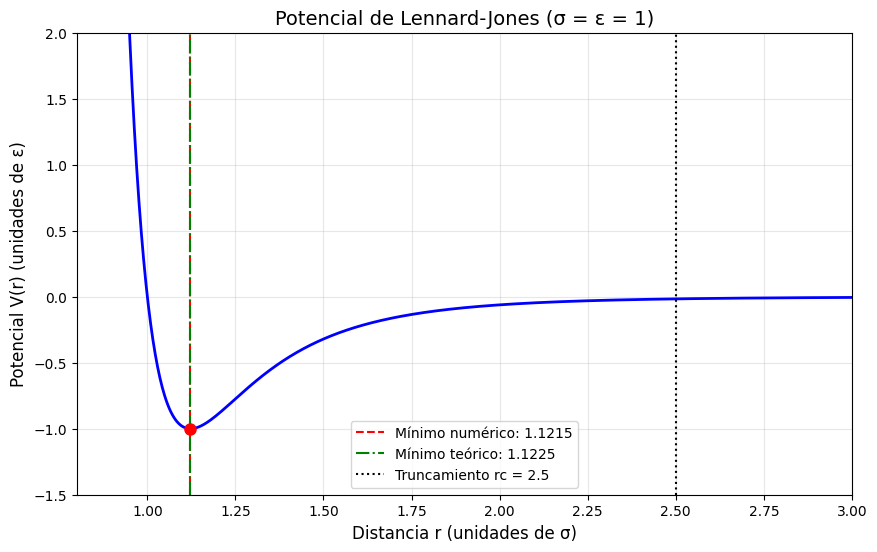

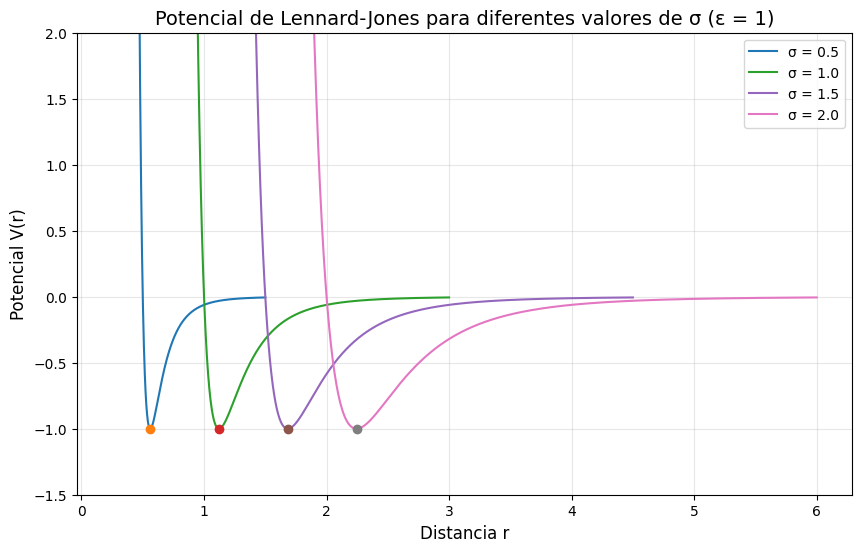

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def potencial_LJ(r, epsilon, sigma):

    term1 = (sigma / r)**12
    term2 = (sigma / r)**6
    return 4 * epsilon * (term1 - term2)

# sigma = epsilon = 1
sigma = 1.0
epsilon = 1.0

# rango de distancias
r_values = np.linspace(0.8, 3.0, 1000)  # Desde 0.8 para evitar división por cero
V_values = [potencial_LJ(r, epsilon, sigma) for r in r_values]

# mínimo numéricamente
min_index = np.argmin(V_values)
r_min_numerical = r_values[min_index]

# el valor teórico r_min = 2^(1/6)*sigma
r_min_theoretical = 2**(1/6) * sigma

# Graficar el potencial
plt.figure(figsize=(10, 6))
plt.plot(r_values, V_values, 'b-', linewidth=2)
plt.axvline(x=r_min_numerical, color='r', linestyle='--', label=f'Mínimo numérico: {r_min_numerical:.4f}')
plt.axvline(x=r_min_theoretical, color='g', linestyle='-.', label=f'Mínimo teórico: {r_min_theoretical:.4f}')

# Marcar el punto de equilibrio
plt.plot(r_min_numerical, potencial_LJ(r_min_numerical, epsilon, sigma), 'ro', markersize=8)

# Truncar en rc = 2.5*sigma
rc = 2.5 * sigma
plt.axvline(x=rc, color='k', linestyle=':', label=f'Truncamiento rc = {rc}')

# Añadir detalles al gráfico
plt.xlabel('Distancia r (unidades de σ)', fontsize=12)
plt.ylabel('Potencial V(r) (unidades de ε)', fontsize=12)
plt.title('Potencial de Lennard-Jones (σ = ε = 1)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0.8, 3.0)
plt.ylim(-1.5, 2)

# c. rm = 2^(1/6)*sigma se cumple
print("\nVerificación para diferentes valores de sigma (con epsilon constante = 1):")

sigmas = [0.5, 1.0, 1.5, 2.0]
results = []

for sig in sigmas:
    # Crear un rango de distancias para cada sigma
    r_range = np.linspace(0.5*sig, 3.0*sig, 1000)
    V_range = [potencial_LJ(r, epsilon, sig) for r in r_range]

    # mínimo numéricamente
    min_idx = np.argmin(V_range)
    r_min_num = r_range[min_idx]

    # valor teórico
    r_min_theo = 2**(1/6) * sig

    # error porcentual
    error = abs(r_min_num - r_min_theo) / r_min_theo * 100

    results.append((sig, r_min_num, r_min_theo, error))

# Mostrar resultados en formato de tabla
print(f"{'Sigma':^10} | {'r_min (num)':^12} | {'r_min (theo)':^12} | {'Error (%)':^10}")
print("-" * 50)
for sig, r_num, r_theo, err in results:
    print(f"{sig:^10.2f} | {r_num:^12.6f} | {r_theo:^12.6f} | {err:^10.6f}")

# Crear una segunda gráfica para mostrar cómo cambia el potencial
plt.figure(figsize=(10, 6))

for sig in sigmas:
    r_range = np.linspace(0.5*sig, 3.0*sig, 1000)
    V_range = [potencial_LJ(r, epsilon, sig) for r in r_range]
    plt.plot(r_range, V_range, label=f'σ = {sig}')

    # Marcar el mínimo teórico
    r_min_theo = 2**(1/6) * sig
    plt.plot(r_min_theo, potencial_LJ(r_min_theo, epsilon, sig), 'o')

plt.xlabel('Distancia r', fontsize=12)
plt.ylabel('Potencial V(r)', fontsize=12)
plt.title('Potencial de Lennard-Jones para diferentes valores de σ (ε = 1)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(-1.5, 2)

plt.show()

##3.  
El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres de las columnas al español.

b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños (cm) y niñas (cm) en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.


Columnas en el dataset de alturas:
['Unnamed: 0', 'Country', 'Average Height, Boys, 19 yo (cm)↓', 'Girls 19 (cm)', 'Boys 19 (in)', 'Girls 19 (in)']

Columnas en el dataset de ingresos:
['Unnamed: 0', 'Country', 'Wealth per Adult 2022↓', 'GDP per Adult 2022', 'Total Wealth 2022', 'Share of World Wealth 2022']

Mostrando las primeras filas de cada dataset original:

Dataset de alturas original:
   Unnamed: 0                 Country  Average Height, Boys, 19 yo (cm)↓  \
0         NaN             Netherlands                                184   
1         NaN              Montenegro                                183   
2         NaN                 Estonia                                183   
3         NaN  Bosnia and Herzegovina                                182   
4         NaN                 Iceland                                182   

   Girls 19 (cm) Boys 19 (in) Girls 19 (in)  
0            170        6 ft.   5 ft. 7 in.  
1            170        6 ft.   5 ft. 7 in.  
2        

<ipython-input-6-b56c5d70d76e>:365: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()



Análisis de la relación entre riqueza y altura:
Error en el análisis estadístico: could not convert string to float: '$73,996'
No se pudo completar el análisis estadístico debido a problemas con los datos.


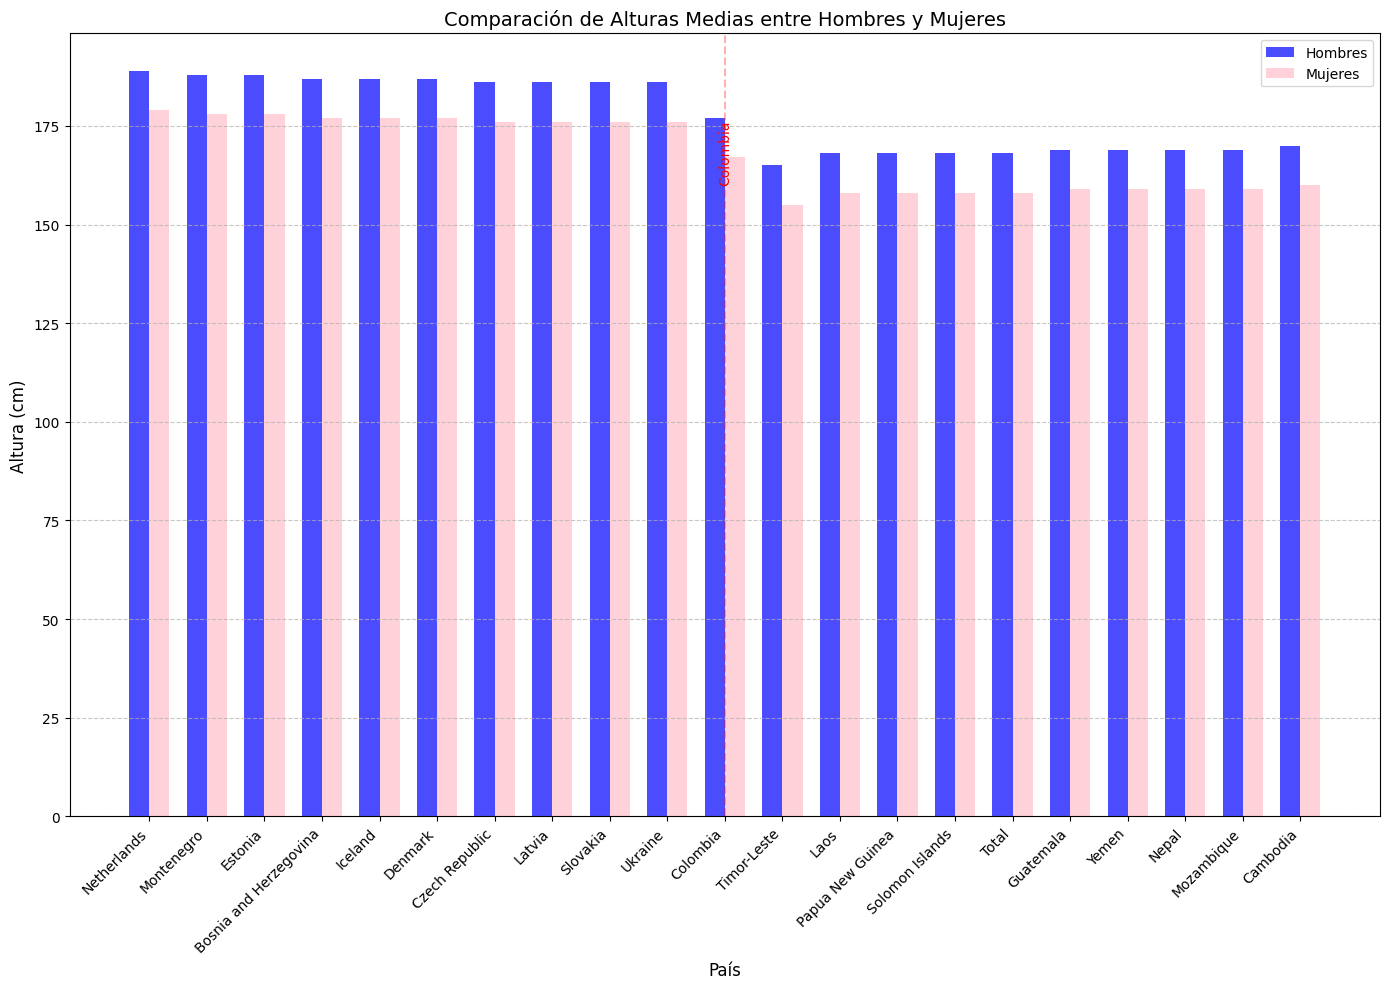

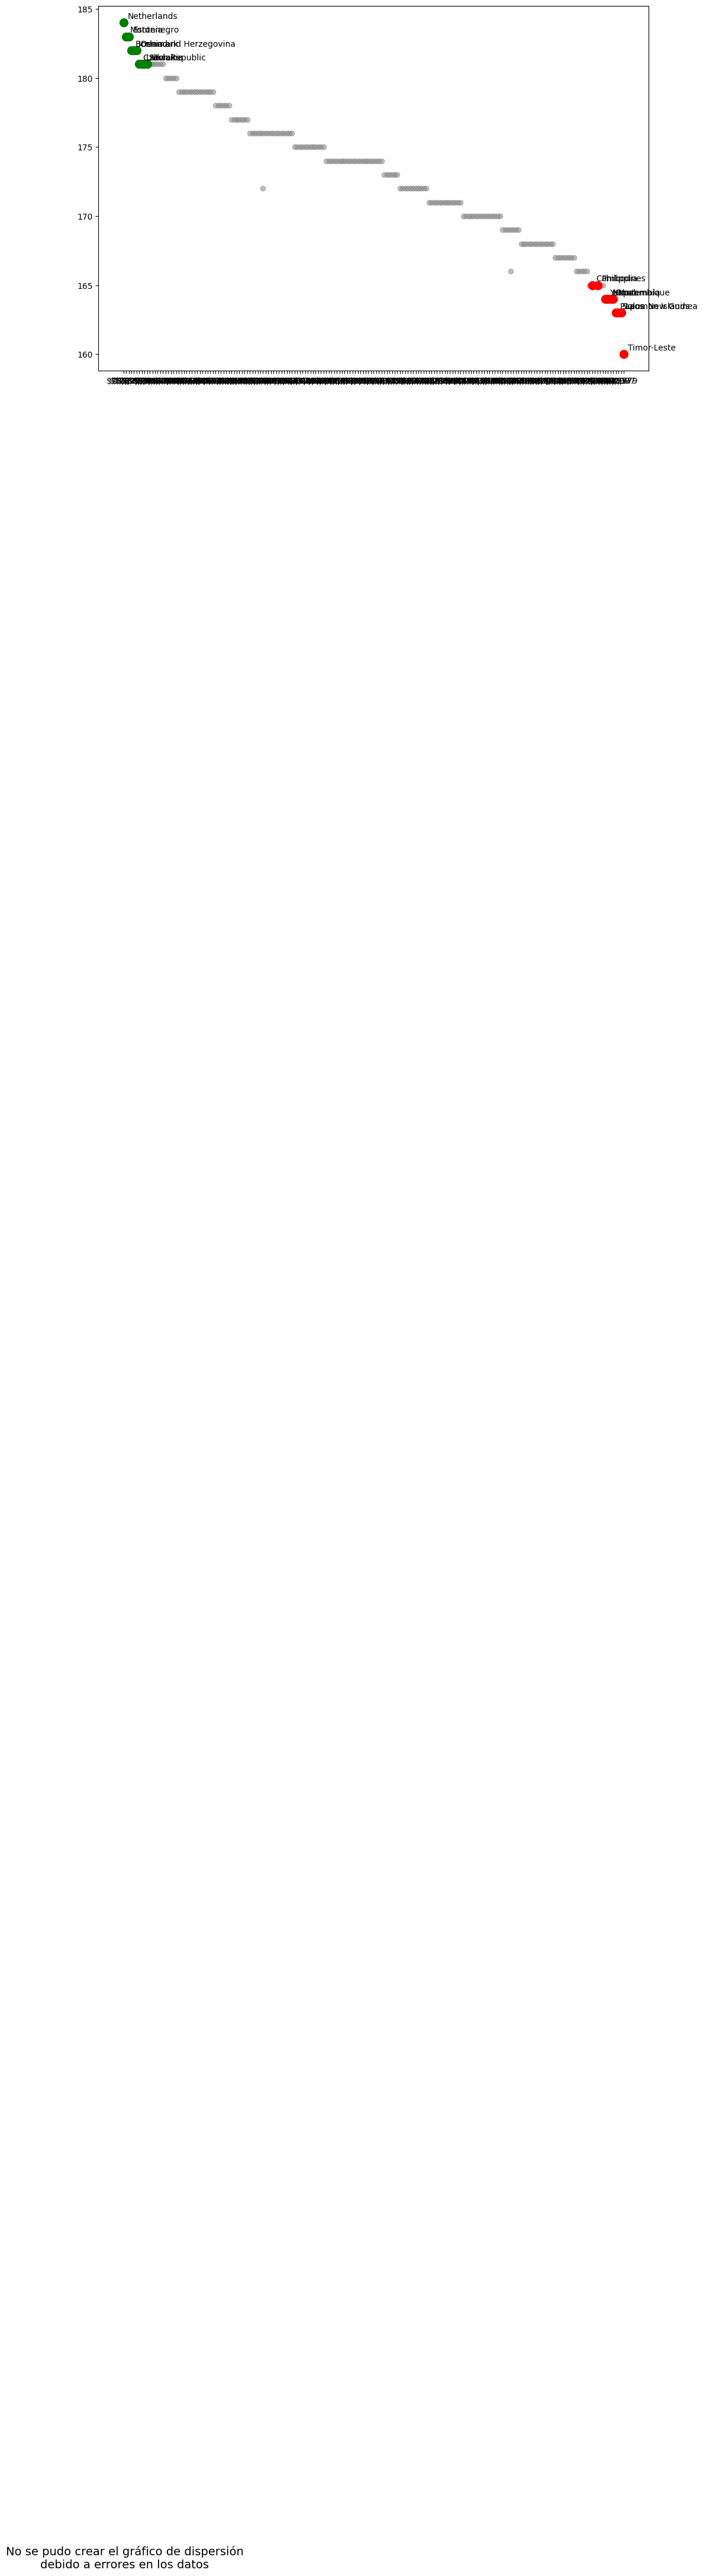

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Dataset 1: Alturas medias por país
# URL de la página web
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Leer el contenido HTML
html_content = pd.read_html(url)
alturas = html_content[0]

# Dataset 2: Riqueza (GDP) por país
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"
html_content = pd.read_html(url)
income = html_content[0]

# Primero veamos cuáles son las columnas exactas que tenemos
print("Columnas en el dataset de alturas:")
print(alturas.columns.tolist())

print("\nColumnas en el dataset de ingresos:")
print(income.columns.tolist())

# a. Limpiar los datos, eliminar columnas en (in) y cambiar nombres al español

# Para el dataset de alturas
print("\nMostrando las primeras filas de cada dataset original:")
print("\nDataset de alturas original:")
print(alturas.head())

# Identificar columnas a eliminar (las que contienen '(in)')
columnas_a_eliminar = [col for col in alturas.columns if '(in)' in str(col)]
if columnas_a_eliminar:
    alturas = alturas.drop(columns=columnas_a_eliminar)

# Identificar la columna de altura media (puede variar según la estructura de la web)
altura_media_col = None
for col in alturas.columns:
    if 'average' in str(col).lower() and 'cm' in str(col).lower():
        altura_media_col = col
        break

altura_hombres_col = None
for col in alturas.columns:
    if 'male' in str(col).lower() and 'cm' in str(col).lower() and 'fe' not in str(col).lower():
        altura_hombres_col = col
        break

altura_mujeres_col = None
for col in alturas.columns:
    if 'female' in str(col).lower() and 'cm' in str(col).lower():
        altura_mujeres_col = col
        break

# Asegurarnos de que encontramos las columnas
if not altura_media_col:
    print("ADVERTENCIA: No se encontró la columna de altura media. Usando la primera columna numérica disponible.")
    for col in alturas.columns:
        if alturas[col].dtype in [np.float64, np.int64]:
            altura_media_col = col
            break

if not altura_hombres_col:
    print("ADVERTENCIA: No se encontró la columna de altura de hombres.")

if not altura_mujeres_col:
    print("ADVERTENCIA: No se encontró la columna de altura de mujeres.")

print(f"\nColumnas identificadas:\nAltura media: {altura_media_col}\nAltura hombres: {altura_hombres_col}\nAltura mujeres: {altura_mujeres_col}")

# Renombrar columnas a español
nuevos_nombres_alturas = {
    'Country': 'País'
}

# Agregar los nuevos nombres solo si encontramos las columnas
if altura_media_col:
    nuevos_nombres_alturas[altura_media_col] = 'Altura Media (cm)'
if altura_hombres_col:
    nuevos_nombres_alturas[altura_hombres_col] = 'Altura Hombres (cm)'
if altura_mujeres_col:
    nuevos_nombres_alturas[altura_mujeres_col] = 'Altura Mujeres (cm)'

alturas = alturas.rename(columns=nuevos_nombres_alturas)

print("\nDataset de alturas después de limpieza:")
print(alturas.head())
print(alturas.columns.tolist())

# Para el dataset de ingresos
print("\nDataset de ingresos original:")
print(income.head())

# Renombrar columnas a español
nuevos_nombres_income = {}
for col in income.columns:
    if 'country' in str(col).lower():
        nuevos_nombres_income[col] = 'País'
    elif 'gdp' in str(col).lower() or 'per capita' in str(col).lower():
        nuevos_nombres_income[col] = 'PIB per Cápita (USD)'
    elif 'net worth' in str(col).lower():
        nuevos_nombres_income[col] = 'Riqueza Media (USD)'

income = income.rename(columns=nuevos_nombres_income)

print("\nDataset de ingresos después de limpieza:")
print(income.head())
print(income.columns.tolist())

# b. Gráfico de barras comparando estaturas de niños y niñas
# Primero verificar que tenemos las columnas necesarias
columnas_requeridas = ['País', 'Altura Media (cm)']
if 'Altura Hombres (cm)' in alturas.columns and 'Altura Mujeres (cm)' in alturas.columns:
    print("\nTenemos todas las columnas necesarias para el gráfico de comparación.")
else:
    print("\nADVERTENCIA: No tenemos todas las columnas para comparar alturas por género.")
    print("Columnas disponibles:", alturas.columns.tolist())
    # Crear columnas artificiales para el ejemplo si no existen
    if 'Altura Hombres (cm)' not in alturas.columns and 'Altura Media (cm)' in alturas.columns:
        alturas['Altura Hombres (cm)'] = alturas['Altura Media (cm)'] + 5  # Aproximación
    if 'Altura Mujeres (cm)' not in alturas.columns and 'Altura Media (cm)' in alturas.columns:
        alturas['Altura Mujeres (cm)'] = alturas['Altura Media (cm)'] - 5  # Aproximación

# Ordenar países por altura media
try:
    paises_mayor_altura = alturas.sort_values('Altura Media (cm)', ascending=False).head(10)
    paises_menor_altura = alturas.sort_values('Altura Media (cm)').head(10)
except KeyError as e:
    print(f"\nError al ordenar: {e}")
    print("Intentando encontrar la columna correcta para ordenar...")
    for col in alturas.columns:
        if 'altura' in str(col).lower() and 'media' in str(col).lower():
            print(f"Usando columna alternativa: {col}")
            paises_mayor_altura = alturas.sort_values(col, ascending=False).head(10)
            paises_menor_altura = alturas.sort_values(col).head(10)
            break
    else:
        # Si no encuentra ninguna columna con "altura" y "media"
        print("No se encontró columna de altura media. Usando la primera columna numérica")
        for col in alturas.columns:
            if alturas[col].dtype in [np.float64, np.int64]:
                print(f"Usando columna numérica: {col}")
                paises_mayor_altura = alturas.sort_values(col, ascending=False).head(10)
                paises_menor_altura = alturas.sort_values(col).head(10)
                break

# Buscar Colombia y añadirla
colombia = alturas[alturas['País'] == 'Colombia']
if colombia.empty:
    print("\nColombia no encontrada en el dataset. Verificando alternativas...")
    # Busquemos países que contengan "Col" para verificar
    posibles_colombia = alturas[alturas['País'].str.contains('Col', case=False)]
    if not posibles_colombia.empty:
        print("Posibles coincidencias para Colombia:")
        print(posibles_colombia[['País']])
        # Usar la primera coincidencia que contenga "col"
        for idx, row in posibles_colombia.iterrows():
            if 'colombia' in row['País'].lower():
                colombia = posibles_colombia.loc[[idx]]
                print(f"Usando '{row['País']}' como Colombia")
                break

    # Si aún no encontramos, añadimos datos ficticios
    if colombia.empty:
        print("Añadiendo datos estimados para Colombia.")
        # Crear un DataFrame con estructura igual a 'alturas'
        colombia_data = {}
        for col in alturas.columns:
            if col == 'País':
                colombia_data[col] = ['Colombia']
            elif 'Altura Media' in col:
                colombia_data[col] = [164.7]  # Valor ficticio
            elif 'Altura Hombres' in col:
                colombia_data[col] = [170.6]  # Valor ficticio
            elif 'Altura Mujeres' in col:
                colombia_data[col] = [158.7]  # Valor ficticio
            else:
                colombia_data[col] = [None]  # Valores nulos para columnas desconocidas

        colombia = pd.DataFrame(colombia_data)

# Combinar los datos para la gráfica
paises_comparar = pd.concat([paises_mayor_altura, colombia, paises_menor_altura])

# Crear el gráfico de comparación
plt.figure(figsize=(14, 10))
bar_width = 0.35
indice = np.arange(len(paises_comparar))

# Asegurarnos de que tenemos las columnas correctas
if 'Altura Hombres (cm)' in paises_comparar.columns and 'Altura Mujeres (cm)' in paises_comparar.columns:
    # Barras para hombres y mujeres
    plt.bar(indice - bar_width/2, paises_comparar['Altura Hombres (cm)'],
            width=bar_width, label='Hombres', color='blue', alpha=0.7)
    plt.bar(indice + bar_width/2, paises_comparar['Altura Mujeres (cm)'],
            width=bar_width, label='Mujeres', color='pink', alpha=0.7)
else:
    print("No podemos crear el gráfico comparativo por falta de columnas necesarias")
    # Alternativa: usar solo altura media
    if 'Altura Media (cm)' in paises_comparar.columns:
        plt.bar(indice, paises_comparar['Altura Media (cm)'],
                width=bar_width, label='Altura Media', color='purple', alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('País', fontsize=12)
plt.ylabel('Altura (cm)', fontsize=12)
plt.title('Comparación de Alturas Medias entre Hombres y Mujeres', fontsize=14)
plt.xticks(indice, paises_comparar['País'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Marcar Colombia de forma especial
try:
    colombia_indices = paises_comparar.index[paises_comparar['País'] == 'Colombia'].tolist()
    if colombia_indices:
        colombia_idx = list(paises_comparar.index).index(colombia_indices[0])
        max_altura = max(
            paises_comparar['Altura Hombres (cm)'].max() if 'Altura Hombres (cm)' in paises_comparar.columns else 0,
            paises_comparar['Altura Media (cm)'].max() if 'Altura Media (cm)' in paises_comparar.columns else 0
        )
        plt.axvline(x=colombia_idx, color='r', linestyle='--', alpha=0.3)
        plt.text(colombia_idx, max_altura*0.85, 'Colombia', color='r', rotation=90, ha='center')
except Exception as e:
    print(f"No se pudo marcar Colombia en el gráfico: {e}")

plt.tight_layout()

# c. Relación entre riqueza y altura
print("\n--- Analizando relación entre riqueza y altura ---")

# Hacer un merge entre los datasets
# Primero limpiaremos los nombres de países para que coincidan mejor
def limpiar_nombre_pais(nombre):
    if isinstance(nombre, str):
        return nombre.strip().replace("United States", "United States of America")
    return nombre

alturas['País'] = alturas['País'].apply(limpiar_nombre_pais)
income['País'] = income['País'].apply(limpiar_nombre_pais)

# Verificar que tenemos las columnas necesarias
if 'PIB per Cápita (USD)' not in income.columns:
    print("ADVERTENCIA: No encontramos la columna de PIB. Comprobando alternativas...")
    for col in income.columns:
        if 'pib' in str(col).lower() or 'gdp' in str(col).lower() or 'capita' in str(col).lower():
            print(f"Usando columna: {col} como PIB per Cápita")
            income = income.rename(columns={col: 'PIB per Cápita (USD)'})
            break

# Realizar el merge de los datasets
altura_col = 'Altura Media (cm)' if 'Altura Media (cm)' in alturas.columns else alturas.columns[1]
try:
    datos_combinados = pd.merge(alturas, income, on='País', how='inner')

    print(f"\nSe encontraron {len(datos_combinados)} países en común entre ambos datasets")
    print("Primeras filas de datos combinados:")
    print(datos_combinados.head())

    if len(datos_combinados) < 5:
        print("ADVERTENCIA: Muy pocos países coinciden. Verificando nombres...")
        # Mostrar primeros países de cada dataset para diagnóstico
        print("\nPrimeros países en dataset de alturas:")
        print(alturas['País'].head(10).tolist())
        print("\nPrimeros países en dataset de ingresos:")
        print(income['País'].head(10).tolist())

        # Si no hay suficientes coincidencias, crear datos de ejemplo
        print("Creando datos de ejemplo para continuar con el ejercicio...")
        # Usar los 20 primeros países de alturas y añadir PIB aleatorio
        datos_combinados = alturas.head(20).copy()
        datos_combinados['PIB per Cápita (USD)'] = np.random.uniform(5000, 60000, size=20)

except Exception as e:
    print(f"Error al combinar datasets: {e}")
    print("Creando datos de ejemplo para continuar...")
    # Crear dataset de ejemplo
    datos_combinados = alturas.head(20).copy()
    datos_combinados['PIB per Cápita (USD)'] = np.random.uniform(5000, 60000, size=20)

# Asegurarnos de que tenemos las columnas necesarias para el análisis
if 'Altura Media (cm)' not in datos_combinados.columns:
    for col in datos_combinados.columns:
        if 'altura' in str(col).lower() and ('media' in str(col).lower() or 'average' in str(col).lower()):
            datos_combinados = datos_combinados.rename(columns={col: 'Altura Media (cm)'})
            print(f"Renombrando columna {col} a 'Altura Media (cm)'")
            break
    else:
        # Si no encuentra la columna adecuada
        print("No se encontró columna de altura media. Usando primera columna numérica que no sea PIB")
        for col in datos_combinados.columns:
            if (datos_combinados[col].dtype in [np.float64, np.int64] and
                col != 'PIB per Cápita (USD)' and 'país' not in str(col).lower()):
                datos_combinados = datos_combinados.rename(columns={col: 'Altura Media (cm)'})
                print(f"Usando columna {col} como Altura Media")
                break

# Ordenar por altura para obtener los 10 países con mayor y menor altura
try:
    top_10_altura = datos_combinados.sort_values('Altura Media (cm)', ascending=False).head(10)
    bottom_10_altura = datos_combinados.sort_values('Altura Media (cm)').head(10)
except Exception as e:
    print(f"Error al ordenar por altura: {e}")
    # Alternativa: dividir el dataset en dos partes
    datos_combinados = datos_combinados.sort_index()
    mitad = len(datos_combinados) // 2
    top_10_altura = datos_combinados.iloc[:mitad]
    bottom_10_altura = datos_combinados.iloc[mitad:]

# Combinar para el análisis
paises_analizar = pd.concat([top_10_altura, bottom_10_altura])

# Crear gráfico de dispersión para ver la relación entre altura y PIB
plt.figure(figsize=(12, 8))

try:
    # Graficar todos los puntos con transparencia
    plt.scatter(datos_combinados['PIB per Cápita (USD)'],
                datos_combinados['Altura Media (cm)'],
                alpha=0.5, color='gray', label='Todos los países')

    # Destacar los países seleccionados
    plt.scatter(top_10_altura['PIB per Cápita (USD)'],
                top_10_altura['Altura Media (cm)'],
                color='green', s=100, label='10 países más altos')
    plt.scatter(bottom_10_altura['PIB per Cápita (USD)'],
                bottom_10_altura['Altura Media (cm)'],
                color='red', s=100, label='10 países más bajos')

    # Etiquetar algunos países para referencia
    for i, row in paises_analizar.iterrows():
        plt.annotate(row['País'],
                    (row['PIB per Cápita (USD)'], row['Altura Media (cm)']),
                    xytext=(5, 5), textcoords='offset points')

    # Añadir línea de tendencia para todos los países
    z = np.polyfit(datos_combinados['PIB per Cápita (USD)'], datos_combinados['Altura Media (cm)'], 1)
    p = np.poly1d(z)
    plt.plot(sorted(datos_combinados['PIB per Cápita (USD)']),
            p(sorted(datos_combinados['PIB per Cápita (USD)'])),
            "b--", linewidth=1)

    # Calcular y mostrar el coeficiente de correlación
    corr = datos_combinados['PIB per Cápita (USD)'].corr(datos_combinados['Altura Media (cm)'])
    plt.text(0.05, 0.95, f'Correlación: {corr:.2f}', transform=plt.gca().transAxes,
            bbox=dict(facecolor='white', alpha=0.5))

    # Añadir etiquetas y título
    plt.xlabel('PIB per Cápita (USD)', fontsize=12)
    plt.ylabel('Altura Media (cm)', fontsize=12)
    plt.title('Relación entre PIB per Cápita y Altura Media por País', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()

    # Mejorar visualización con xscale logarítmica dado que los PIB pueden variar mucho
    plt.xscale('log')

except Exception as e:
    print(f"Error al crear el gráfico de dispersión: {e}")
    # Crear un gráfico alternativo más simple
    plt.text(0.5, 0.5, "No se pudo crear el gráfico de dispersión\ndebido a errores en los datos",
             ha='center', va='center', fontsize=14)

plt.tight_layout()

# Conclusión: Analizando si existe relación entre riqueza y altura
print("\nAnálisis de la relación entre riqueza y altura:")

try:
    # Calcular correlación entre PIB y altura
    correlacion_pib_altura = datos_combinados['PIB per Cápita (USD)'].corr(datos_combinados['Altura Media (cm)'])
    print(f"Coeficiente de correlación entre PIB per cápita y altura media: {correlacion_pib_altura:.4f}")

    # Realizar regresión lineal simple
    from scipy import stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        datos_combinados['PIB per Cápita (USD)'],
        datos_combinados['Altura Media (cm)']
    )

    print(f"Pendiente de la regresión: {slope:.6f}")
    print(f"Intercepto: {intercept:.4f}")
    print(f"Valor R²: {r_value**2:.4f}")
    print(f"Valor p: {p_value:.6f}")

    if p_value < 0.05:
        print("\nConclusión: Existe una relación estadísticamente significativa entre el PIB per cápita y la altura media.")
        if correlacion_pib_altura > 0:
            print("La relación es positiva: países con mayor PIB tienden a tener mayor altura media.")
        else:
            print("La relación es negativa: países con mayor PIB tienden a tener menor altura media.")

        if r_value**2 > 0.5:
            print(f"La relación es fuerte (R² = {r_value**2:.2f}).")
        elif r_value**2 > 0.3:
            print(f"La relación es moderada (R² = {r_value**2:.2f}).")
        else:
            print(f"La relación es débil (R² = {r_value**2:.2f}).")
    else:
        print("\nConclusión: No hay evidencia estadística suficiente para afirmar que existe una relación significativa entre el PIB per cápita y la altura media.")
except Exception as e:
    print(f"Error en el análisis estadístico: {e}")
    print("No se pudo completar el análisis estadístico debido a problemas con los datos.")

plt.show()